In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [4]:
rnd.randomstate(np.random.RandomState(seed=42), force=True);

In [5]:
X = proc.OrnsteinUhlenbeckProcess(transition=1., vol=1.)

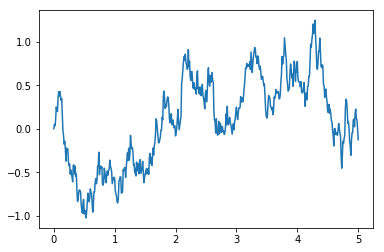

In [6]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=.01))
df = sim.run(em)
plt.plot(df);


In [16]:
kf = filtering.KalmanFilter(time=0., statedistr=N(3., 9.), process=X)
observable = kf.createobservable(filtering.KalmanFilterObsModel.create(1.), X)
str(observable.predict(2))

'PredictedObs(time=2, distr=Normal(mean=[[ 0.40600585]], cov=[[ 0.65568293]]), crosscov=[[ 0.65568293]])'